## Table of Contents
* [Module 1: Data](#Module-1:-Data)
    * [Concepts](#Concepts:)
    * [User Stories](#User-Stories:)
        * [Polymer 3D Printer](3.%20Advanced%20Topics/3.1.%20Aerotech%20Data%20Collection%20Platform/Aerotech%20Data%20Collection.ipynb)
    * [Summary Data](#Summary-Data:)
    * [Assessment](#Assessment:)
        * [Take a quiz](http://example.com/quiz)
#### [🏠 Home](../../welcomePage.ipynb)

# Green Belt: Hands-On Preprocessing for Digital Engineering (4-6 Hours)

## Objective:
Provide hands-on experience in data preprocessing techniques for structured and semi-structured data in Python.

---

## Topics to Discuss and Practice

### 1. Loading and Exploring Engineering Data
- Loading datasets from CSV, Excel, JSON formats.
- Inspecting data for common issues:
  - Missing values, outliers, incorrect data types.
- Summary statistics (`.describe()`), data visualization (basic plots).

---

### 2. Handling Missing Data
- Techniques for missing data handling:
  - Dropping rows/columns (`dropna()`).
  - Filling missing data (`fillna()`) with:
    - Mean, median, mode for numerical data.
    - Forward/backward fill for time-series.
- Visualizing the impact of missing data handling.

---

### 3. Dealing with Outliers
- Identifying outliers using boxplots and histograms.
- Handling outliers:
  - Clipping/extending values.
  - Dropping rows with extreme outliers.
  - Statistical methods like Z-scores.

---

### 4. Basic Data Transformations
- Scaling numerical data:
  - Min-Max Scaling, Z-score normalization.
- Encoding categorical data:
  - Label encoding.
  - One-hot encoding.
- Visualizing transformations.

---

### 5. Time-Series Data Basics
- Introduction to time-series data in engineering:
  - Examples: IoT sensor readings, telemetry data.
- Handling time-stamped data:
  - Parsing timestamps in `pandas`.
  - Resampling and aggregating data:
    - Converting raw data to hourly/daily summaries.
- Dealing with irregular sampling and missing values.

---

### 6. Mini-Project
- **Objective**: Clean and preprocess a small engineering dataset.
- **Tasks**:
  - Identify and handle missing values.
  - Scale and encode features.
  - Resample and aggregate time-series data.


In this module, we will adopt a more hands-on approach to dealing with data in digital engineering. Before diving into this practical exploration, please ensure you are familiar with the foundational concepts and examples provided in the Yellow Belt Data Module. In this module, we will use a specific manufacturing dataset to practice and enhance our skills across several key areas, including data loading and exploration, handling missing data, dealing with outliers, performing basic data transformations, and exploring time-series data fundamentals.

## Loading the Dataset
We start by importing the necessary library, `pandas`, which is essential for data manipulation and analysis. 
Then, we load our dataset from a CSV file using `pandas.read_csv` function. 
This step involves specifying the path to the file within the current directory and the folder `Module1`.

After loading the dataset, it is helpful to preview the first few rows using the `df.head()` method. This provides a quick snapshot of the data, including the types of data columns and a glimpse of the values, enabling us to confirm that the data has loaded correctly and understand its structure.



In [41]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Module1/predictive_maintenance.csv')

# View Dataset
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551.0,42.8,0.0,0,No Failure
1,2,L47181,L,298.2,308.7,1408.0,46.3,3.0,0,No Failure
2,3,L47182,L,298.1,308.5,1498.0,49.4,5.0,0,No Failure
3,4,L47183,L,298.2,308.6,1433.0,39.5,7.0,0,No Failure
4,5,L47184,L,298.2,308.7,1408.0,40.0,NaN,0,No Failure


### Inspecting the Dataset for Common Issues
Once the data is loaded, it's crucial to inspect it for any common issues that might affect the analysis. 
This includes checking for missing values, outliers, and incorrect data types. 
We use `df.info()` to get a concise summary of the dataframe, including the number of non-null entries and data type of each column.

In [39]:
# Inspect data for common issues
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      9481 non-null   float64
 4   Process temperature [K]  9685 non-null   float64
 5   Rotational speed [rpm]   9615 non-null   float64
 6   Torque [Nm]              9664 non-null   float64
 7   Tool wear [min]          9688 non-null   float64
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(5), int64(2), object(3)
memory usage: 781.4+ KB


The dataset inspection using `df.info()` reveals missing values in several operational parameters such as 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', and 'Tool wear [min]'. This is not uncommon in manufacturing datasets, where such issues can occur due to several factors:

- **Sensor Malfunctions:** Critical sensor failures or maintenance lapses can prevent accurate data logging.
- **Data Transmission Errors:** Issues in data transmission can lead to incomplete records, especially in environments with electronic interferences.
- **Operational Disruptions:** Adjustments in production processes or machine downtimes often result in data capture gaps.

Addressing these gaps is essential for reliable analysis, prompting the need for robust data collection and maintenance protocols in industrial settings.

### Generating Summary Statistics
To further understand the dataset, we generate summary statistics which provide insights into the central tendency,
dispersion, and shape of the dataset’s distribution. We use `df.describe()` which includes mean, standard deviation, minimum, and maximum values for numerical columns.

In [30]:
# Generate summary statistics
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,9481.000000,9685.000000,9615.000000,9664.000000,9688.000000,10000.000000
mean,5000.50000,300.005390,310.000299,1539.410088,39.981281,107.979356,0.033900
std,2886.89568,2.003227,1.485337,179.877975,9.972205,63.656004,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1504.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1613.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


The dataset's descriptive statistics reveal key insights into the manufacturing process:

- **Temperature Stability**: Both air and process temperatures show low variability, indicating a controlled environment essential for quality consistency.
- **Rotational Speed Variance**: There is a notable spread in rotational speeds (1168 to 2886 rpm), suggesting operational adjustments or different machine settings.
- **Torque Variability**: Torque shows significant fluctuations (from 3.8 to 76.6 Nm), likely reflecting varying operational demands.
- **Tool Wear Range**: Tool wear varies widely (0 to 253 minutes), pointing to differences in machine usage intensity or maintenance practices.

### Basic Data Visualization with Scatter Plot
Visualizing data helps in identifying relationships between variables, patterns, and potential outliers. A scatter plot is particularly useful for examining the relationship between two numerical variables.
Here, we'll plot `Air temperature [K]` against `Process temperature [K]` to see how these temperatures relate in the manufacturing process. This can be crucial for understanding temperature dynamics and their impact on product quality and machine performance.
We will use `matplotlib` for plotting, which provides a straightforward way to create scatter plots.

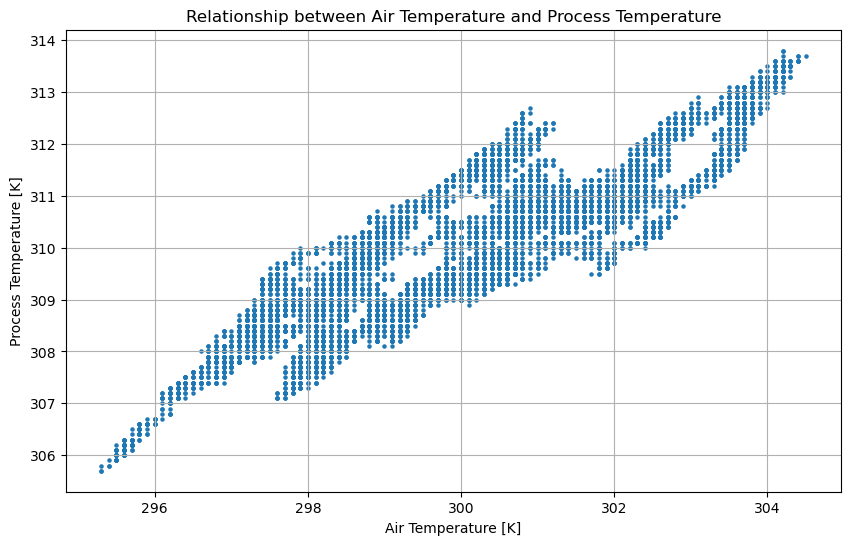

In [31]:
import matplotlib.pyplot as plt

# Scatter plot of Air temperature vs Process temperature
plt.figure(figsize=(10, 6))
plt.scatter(df['Air temperature [K]'], df['Process temperature [K]'], alpha=1, s = 5)
plt.title('Relationship between Air Temperature and Process Temperature')
plt.xlabel('Air Temperature [K]')
plt.ylabel('Process Temperature [K]')
plt.grid(True)
plt.show()

## Handling Missing Data

Handling missing data is crucial in ensuring the quality and reliability of analyses. We will explore two common methods:

1. **Dropping missing data**: This approach involves removing rows or columns that contain missing values, which is straightforward but may result in loss of valuable data if not used judiciously.
2. **Filling missing data**: This method involves replacing missing values with statistically relevant figures (mean, median, or mode) or using methods like forward/backward filling, which are particularly useful in time-series data.

Both techniques help in maintaining the integrity of the dataset for robust analysis.

In [44]:
# Option 1: Delete rows with missing data

# Drop rows with any missing values
cleaned_df = df.dropna()

# We inspect the data again
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8272 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      8272 non-null   int64  
 1   Product ID               8272 non-null   object 
 2   Type                     8272 non-null   object 
 3   Air temperature [K]      8272 non-null   float64
 4   Process temperature [K]  8272 non-null   float64
 5   Rotational speed [rpm]   8272 non-null   float64
 6   Torque [Nm]              8272 non-null   float64
 7   Tool wear [min]          8272 non-null   float64
 8   Target                   8272 non-null   int64  
 9   Failure Type             8272 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 710.9+ KB


In [ ]:
# Option 2: Replace missing data with Mean or Median of that Feature

# Fill missing values with the mean of the column
df_filled_mean = df.fillna(df.mean())

# We inspect the data again
df_filled_mean.info()

### <center>[◀︎ Introduction](../introToDE.ipynb)     [🏠 Home](../../welcomePage.ipynb)     [Module 2 ▶︎](Module2.ipynb)</center>
